In [ ]:
# Optional installs (uncomment if needed)
# !pip install pandas numpy scikit-learn seaborn matplotlib


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.set_option('display.max_columns', 200)
print('Libraries loaded.')

Libraries loaded.


In [2]:
# Load features and labels (URLs by default; replace with local paths if preferred)
URL_X = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
URL_y = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'

X = pd.read_csv(URL_X)
y_df = pd.read_csv(URL_y)

# Detect target column name robustly
target_col = 'Class' if 'Class' in y_df.columns else ('class' if 'class' in y_df.columns else None)
if target_col is None:
    raise ValueError(f"No 'Class' or 'class' in labels file. Columns: {list(y_df.columns)}")

y = y_df[target_col].astype(int)

# Align lengths defensively (should already match in the provided datasets)
if len(X) != len(y):
    n = min(len(X), len(y))
    X = X.iloc[:n].copy()
    y = y.iloc[:n].copy()
    print(f'Aligned to common length: {n}')

print('Features shape:', X.shape)
print('Labels shape  :', y.shape)
display(X.head(3))
display(y.head(3))

Features shape: (90, 83)
Labels shape  : (90,)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


0    0
1    0
2    0
Name: Class, dtype: int32

In [3]:
# Standardize features
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print('Train:', X_train.shape, ' Test:', X_test.shape)

Train: (72, 83)  Test: (18, 83)


In [4]:
# Define grids
param_grid_lr  = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs', 'saga']}
param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
param_grid_dt  = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12]}
param_grid_knn = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform', 'distance']}

grids = {
    'Logistic Regression': GridSearchCV(LogisticRegression(max_iter=5000), param_grid_lr, cv=10, n_jobs=-1),
    'SVM'                : GridSearchCV(SVC(), param_grid_svm, cv=10, n_jobs=-1),
    'Decision Tree'      : GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=10, n_jobs=-1),
    'KNN'                : GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, n_jobs=-1),
}

# Train
for name, grid in grids.items():
    grid.fit(X_train, y_train)
    print(f"{name} — best params: {grid.best_params_}")

Logistic Regression — best params: {'C': 0.01, 'solver': 'lbfgs'}
SVM — best params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Decision Tree — best params: {'criterion': 'gini', 'max_depth': 2}
KNN — best params: {'n_neighbors': 3, 'weights': 'uniform'}


In [5]:
results = {}
reports = {}

for name, grid in grids.items():
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    reports[name] = classification_report(y_test, y_pred, output_dict=False)
    print(f"\n{name}: Test Accuracy = {acc:.4f}") 
    print(classification_report(y_test, y_pred))

# Summary table
summary = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).sort_values('Accuracy', ascending=False)
display(summary)


Logistic Regression: Test Accuracy = 0.7778
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18


SVM: Test Accuracy = 0.7778
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18


Decision Tree: Test Accuracy = 0.7778
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg   

c:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

,Accuracy
Logistic Regression,0.777778
SVM,0.777778
Decision Tree,0.777778
KNN,0.777778


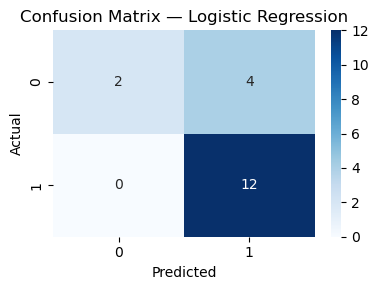

Best model: Logistic Regression | Accuracy: 0.7777777777777778


In [6]:
best_name = summary.index[0]
best_grid = grids[best_name]
y_pred_best = best_grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title(f'Confusion Matrix — {best_name}')
plt.tight_layout(); plt.show()

print('Best model:', best_name, '| Accuracy:', summary.loc[best_name, 'Accuracy'])